In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from collections import Counter

data = pd.read_csv("/data Analytics/cognify intership/Dataset .csv")
print(data)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

In [9]:
df = pd.DataFrame(data)
print(df)


      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Task 1 : Restaurant Reviews

#  Analyze the text reviews to identify the most common positive and negative keywords.

In [17]:
positive_data = df.loc[df['Aggregate rating'] >= 2.5]
print(positive_data)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

In [18]:
positive_keywords = positive_data['Rating text'].unique()
print(positive_keywords)

['Excellent' 'Very Good' 'Good' 'Average']


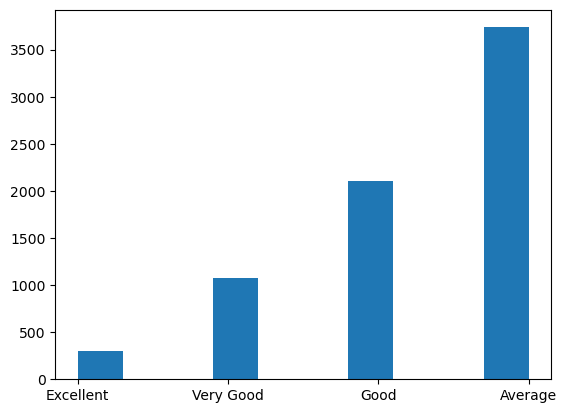

In [19]:
plt.hist(positive_data['Rating text'],label=positive_keywords)
plt.show()

In [20]:
negative_data = df.loc[(df['Aggregate rating'] < 2.5) & (df['Aggregate rating'] > 0)]
negative_keywords = negative_data['Rating text'].unique()
print(negative_keywords)

['Poor']


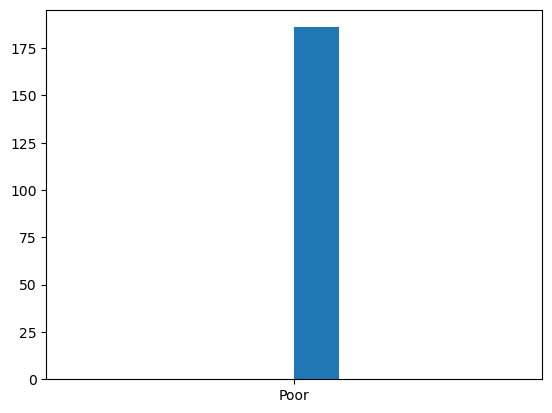

In [21]:
plt.hist(negative_data['Rating text'],label=negative_keywords)
plt.show()

#  Task  2 : Votes Analysis
# Identify the restaurants with the highest and lowest number of votes.

In [12]:
Highest_voted_Resuturant = df.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending=False)
Highest_voted_Resuturant=Highest_voted_Resuturant.idxmax()
print("The Highest Voted Resutarunat is : ",Highest_voted_Resuturant)

The Highest Voted Resutarunat is :  Barbeque Nation


In [15]:
Lowest_voted_Resuturant = df.groupby('Restaurant Name')['Votes'].sum().sort_values()
Lowest_voted_Resuturant=Lowest_voted_Resuturant.idxmin()
print("The Lowest Voted Resutarunat is : ",Lowest_voted_Resuturant)

The Lowest Voted Resutarunat is :  Laxmi Food Corner


#  Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [24]:
correlation = np.corrcoef(df['Votes'],df['Aggregate rating'])
correlation = np.round(correlation,2)
print(correlation)

[[1.   0.31]
 [0.31 1.  ]]


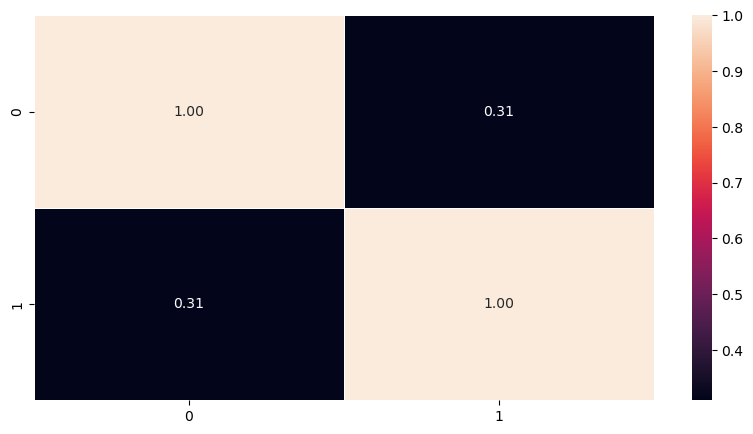

In [25]:
plt.figure(figsize=(10,5),dpi=100)
sns.heatmap(correlation,annot=True,fmt=".2f",linewidth=.4)
plt.show()

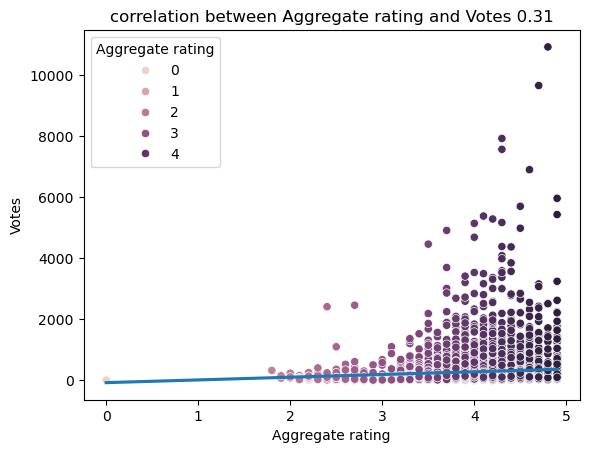

In [26]:
sns.scatterplot(data=df,y="Votes",hue="Aggregate rating",x="Aggregate rating")
sns.regplot(data=df,x="Aggregate rating",y="Votes",scatter=False)
plt.title(f"correlation between Aggregate rating and Votes 0.31")
plt.show()

# Price Range vs Online Delivery and Table Booking 

# Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [48]:
x1 = df['Has Online delivery']
y = df['Average Cost for two']
x2 = df['Has Table booking']

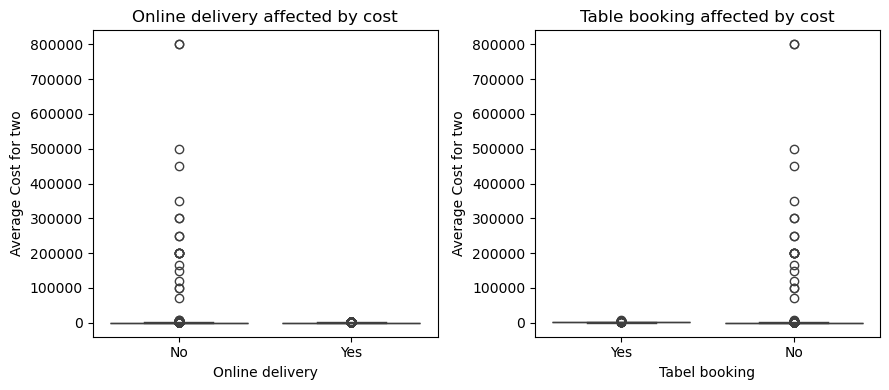

In [58]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.boxplot(x=x1,y=y)
plt.xlabel("Online delivery")
plt.ylabel("Average Cost for two")
plt.title("Online delivery affected by cost")
plt.subplot(1,2,2)
sns.boxplot(x=x2,y=y)
plt.xlabel("Tabel booking")
plt.ylabel("Average Cost for two")
plt.title("Table booking affected by cost")
plt.tight_layout()
plt.show()

# Determine if higher-priced restaurants are more likely to offer these services.


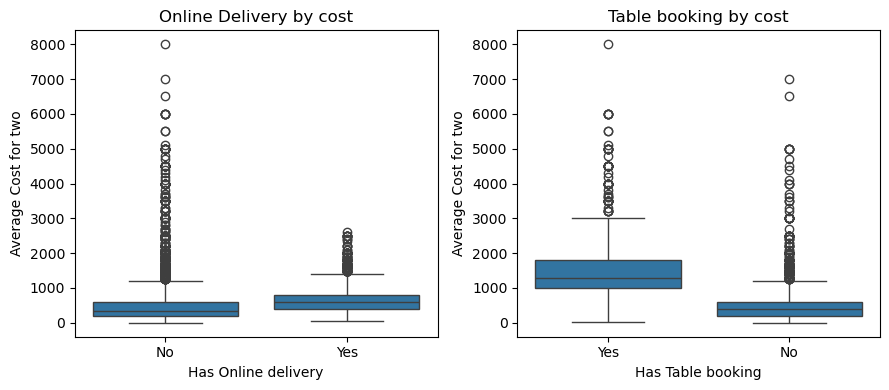

In [64]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.boxplot(x=x1, y='Average Cost for two', data=df.loc[df['Average Cost for two']<10000])
plt.title("Online Delivery by cost")
plt.subplot(1,2,2)
sns.boxplot(x=x2, y='Average Cost for two',data=df.loc[df['Average Cost for two']<10000])
plt.title("Table booking by cost")
plt.tight_layout()
plt.show()